# Projekt - PR

## Opis

Opis problema: Raziskovali bomo prodajo (oz. registracijo novih vozi). Pri teh podatkih se bomo osredotočili na podatke o motorju vozila; torej o porabi, prostornini, vrsti goriva in izpustih. Iz le-teh bomo pridobili podatke o tem, koliko motroji posatajao učinkovitejši. Prav tako lahko z kombiniranjem teh podatkov z spolom, starostjo in ali je vozilo registrirala pravna oseba ugotovimo, koliko učinkovitost motorja vpliva pri nakupu vozil.

Cilji: Spreminjanje motorjev skozi čas. Pridobiti podatke o učinkovitosti motorja. Koliko je učinkovitost motorja pri nakupu avta pomembna za osebe ali podjetja. Napovedati kdaj bodo električni avtomobili dosegli 50% od vseh novih registracij.

Vir podatkov:
    - https://podatki.gov.si - Prvič registrirana vozila po mesecih
    - https://data.europa.eu/euodp

Oblka podatkov: Podatki so txt obliki. Iz podatkov "Prvič registrirana vozila po mesecih" lahko razberemo podatke o osebi, ki je registrirala avto (spol, starost, ...) in podatke oavtomobilu (poraba, medosna razdalja, max teža, model avta, ...)

## Podatki

Pridobili smo podatke o avtih iz slovenije. Le-te smo tudi že uredili.

Pri pridobivanju evropskih podatkov, še nismo uspeli najti takšnih, ki bi nam najbolj ustrezali.

## Procesiranje podatkov

### Branje

Začeli smo z branjem podatkov iz datoteke.

Podatki so ločeni z ";", ampak pojavil se je problem, da je bil le-ta znak uporabljen tudi za ločevanje podatkov znotraj že ločenih podatkov.
Zaradi tega, smo se odločili podatke ločevati z znakom "\"" in zavreči vsak 2. znak (ki je v tem primeru ";").

Vse kar se je prebralo shranimo v tabelo data, ki vsebuje slovarje, kjer so po atributih shranjeni podatki za posamezne vrstice.

Ker je datoteka zelo velika (1 200 000 vsrtic) in ker to zasede zelo veliko pomnilnika in časa ko je shranjeno in ko se obdeluje, bomo za samo testiranje delovanja kode uporabljali datoteko sestavljeno iz prvih 10 000 vrstic originalne datoteke.

In [1]:
import math
import operator
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from csv import DictReader

file = open('podatki_vozila_SLO_urejeno_okrajsano.txt', 'r', encoding='latin-1')
data = []

attributes = []

for attr in file.readline().split(";"):
    attributes.append(attr)
    
for i, line in enumerate(file):
    dataLine = {}
    dataLine["id"] = i
    
    for l, item in enumerate(line.split("\"")):
        if(l%2 != 0):
            dataLine[attributes[(int)((l-1)/2)]] = item
    
    data.append(dataLine)
    
    #if(i % 1000 == 0):
    #    print("Nalaganje", i/100+10)
    
print("Nalaganje končano")

Nalaganje končano


### Nekaj prikazov podatkov

Vrsta goriva glede na starost lastnika

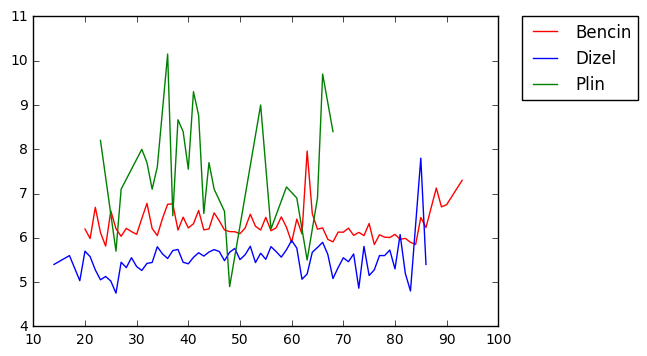

In [13]:
starostiLastnikov = [[], [], []]

povpPoraba = [{}, {}, {}]

x=[[], [], []]
y=[[], [], []]

for podatek in data:
    if podatek['"V.8-Kombinirana poraba goriva"'] == "":
        continue
        
    if podatek['"P.1.3-Vrsta goriva (opis)"'] == "Bencin":
        starostiLastnikov[0].append(podatek['"C2-Starost lastnika vozila"'])
        
        if podatek['"C2-Starost lastnika vozila"'] in povpPoraba[0]:
            value = povpPoraba[0][podatek['"C2-Starost lastnika vozila"']][0] + float(podatek['"V.8-Kombinirana poraba goriva"'].replace(',','.'))
            stev = povpPoraba[0][podatek['"C2-Starost lastnika vozila"']][1] + 1
            povpPoraba[0][podatek['"C2-Starost lastnika vozila"']] = [value, stev]
        else:
            povpPoraba[0][podatek['"C2-Starost lastnika vozila"']]  = [float(podatek['"V.8-Kombinirana poraba goriva"'].replace(',','.')), 1]
        
    
    elif podatek['"P.1.3-Vrsta goriva (opis)"'] == "Dizel":
        starostiLastnikov[1].append(podatek['"C2-Starost lastnika vozila"'])
        
        if podatek['"C2-Starost lastnika vozila"'] in povpPoraba[1]:
            value = povpPoraba[1][podatek['"C2-Starost lastnika vozila"']][0] + float(podatek['"V.8-Kombinirana poraba goriva"'].replace(',','.'))
            stev = povpPoraba[1][podatek['"C2-Starost lastnika vozila"']][1] + 1
            povpPoraba[1][podatek['"C2-Starost lastnika vozila"']] = [value, stev]
        else:
            povpPoraba[1][podatek['"C2-Starost lastnika vozila"']]  = [float(podatek['"V.8-Kombinirana poraba goriva"'].replace(',','.')), 1]
        
        
    elif podatek['"P.1.3-Vrsta goriva (opis)"'] == "Bencin/Utek. naft. plin":
        starostiLastnikov[2].append(podatek['"C2-Starost lastnika vozila"'])
        
        if podatek['"C2-Starost lastnika vozila"'] in povpPoraba[2]:
            value = povpPoraba[2][podatek['"C2-Starost lastnika vozila"']][0] + float(podatek['"V.8-Kombinirana poraba goriva"'].replace(',','.'))
            stev = povpPoraba[2][podatek['"C2-Starost lastnika vozila"']][1] + 1
            povpPoraba[2][podatek['"C2-Starost lastnika vozila"']] = [value, stev]
        else:
            povpPoraba[2][podatek['"C2-Starost lastnika vozila"']]  = [float(podatek['"V.8-Kombinirana poraba goriva"'].replace(',','.')), 1]
        
        
for i in 0, 1, 2:
    for leto in sorted(povpPoraba[i].keys()):
        if(leto!=''):
            if(leto not in x[i]):
                x[i].append(leto)
                y[i].append(povpPoraba[i][leto][0]/povpPoraba[i][leto][1])
            
plt.figure(0)
plt.plot(x[0], y[0], "r-", label="Bencin")
plt.plot(x[1], y[1], "b-", label="Dizel")
plt.plot(x[2], y[2], "g-", label="Plin")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()  

**Povp. poraba goriva glede na starost lastnika avtomobila**

In [15]:
gorivoNaTipOsebe = [{'p':0, 'f':0}, {'p':0, 'f':0}, {'p':0, 'f':0}]


for podatek in data:
    if podatek['"V.8-Kombinirana poraba goriva"'] == "":
        continue
        
    if podatek['"P.1.3-Vrsta goriva (opis)"'] == "Bencin":
        
        if podatek['"C2-Ali je lastnik pravna ali fizicna oseba"']=='P':
            gorivoNaTipOsebe[0]['p']+=1
        elif podatek['"C2-Ali je lastnik pravna ali fizicna oseba"']=='F':
            gorivoNaTipOsebe[0]['f']+=1
    
    elif podatek['"P.1.3-Vrsta goriva (opis)"'] == "Dizel":
        if podatek['"C2-Ali je lastnik pravna ali fizicna oseba"']=='P':
            gorivoNaTipOsebe[1]['p']+=1
        elif podatek['"C2-Ali je lastnik pravna ali fizicna oseba"']=='F':
            gorivoNaTipOsebe[1]['f']+=1
        
    elif podatek['"P.1.3-Vrsta goriva (opis)"'] == "Bencin/Utek. naft. plin":
        if podatek['"C2-Ali je lastnik pravna ali fizicna oseba"']=='P':
            gorivoNaTipOsebe[2]['p']+=1
        elif podatek['"C2-Ali je lastnik pravna ali fizicna oseba"']=='F':
            gorivoNaTipOsebe[2]['f']+=1

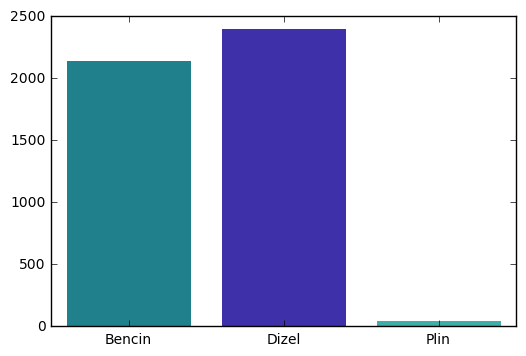

In [58]:
y = [gorivoNaTipOsebe[0]['f'], gorivoNaTipOsebe[1]['f'], gorivoNaTipOsebe[2]['f']]
N = len(y)
x = range(N)

plt.figure(1)
barlist=plt.bar(x, y, align="center", color=[(0.124, 0.504, 0.549,1), (0.244, 0.188, 0.66,1.0), (0.244, 0.688, 0.66,1.0)],edgecolor = "none")
plt.xticks(range(N))
plt.gca().set_xticklabels(["Bencin", "Dizel", "Plin"])
plt.show()

**Število avtomobilov glede na tip goriva za fizične osebe**

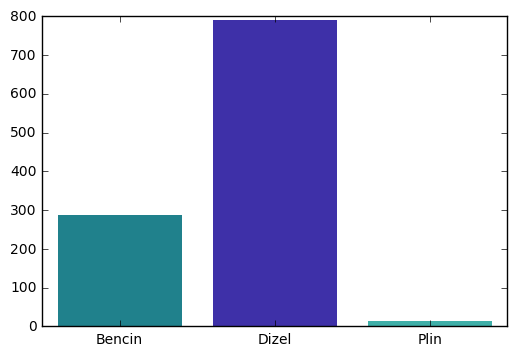

In [59]:
y = [gorivoNaTipOsebe[0]['p'], gorivoNaTipOsebe[1]['p'], gorivoNaTipOsebe[2]['p']]
N = len(y)
x = range(N)

plt.figure(1)
barlist=plt.bar(x, y, align="center", color=[(0.124, 0.504, 0.549,1), (0.244, 0.188, 0.66,1.0), (0.244, 0.688, 0.66,1.0)],edgecolor = "none")
plt.xticks(range(N))
plt.gca().set_xticklabels(["Bencin", "Dizel", "Plin"])
plt.show()

**Število avtomobilov glede na tip goriva za pravne osebe**

In [83]:
CO2EmisijaB=[]
CO2EmisijaD=[]
CO2EmisijaP=[]


for podatek in data:
    if podatek['"V.8-Kombinirana poraba goriva"'] == "":
        continue
    if(podatek['"V.7-CO2"']!=''):
        if podatek['"P.1.3-Vrsta goriva (opis)"'] == "Bencin":
            CO2EmisijaB.append(float(podatek['"V.7-CO2"'].replace(',','.')))

        elif podatek['"P.1.3-Vrsta goriva (opis)"'] == "Dizel":
            CO2EmisijaD.append(float(podatek['"V.7-CO2"'].replace(',','.')))

        elif podatek['"P.1.3-Vrsta goriva (opis)"'] == "Bencin/Utek. naft. plin":
            CO2EmisijaP.append(float(podatek['"V.7-CO2"'].replace(',','.')))

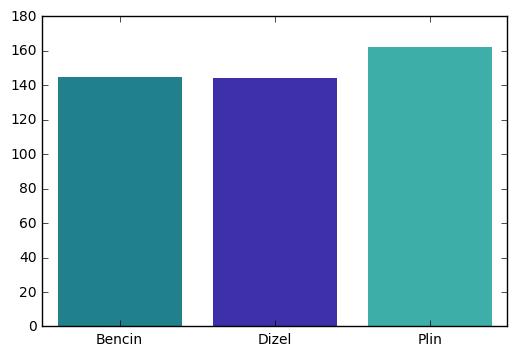

In [91]:
povpEmisije=[]
vs=0
for st in CO2EmisijaB:
    vs+=st
povpEmisije.append(vs/len(CO2EmisijaB))
vs=0
for st in CO2EmisijaD:
    vs+=st
povpEmisije.append(vs/len(CO2EmisijaD))
vs=0
for st in CO2EmisijaP:
    vs+=st
povpEmisije.append(vs/len(CO2EmisijaP))


y = povpEmisije
N = len(y)
x = range(N)

plt.figure(1)
barlist=plt.bar(x, y, align="center", color=[(0.124, 0.504, 0.549,1), (0.244, 0.188, 0.66,1.0), (0.244, 0.688, 0.66,1.0)],edgecolor = "none")
plt.xticks(range(N))
plt.gca().set_xticklabels(["Bencin", "Dizel", "Plin"])
plt.show()

**Povp. emisije CO2 glede na tip goriva**